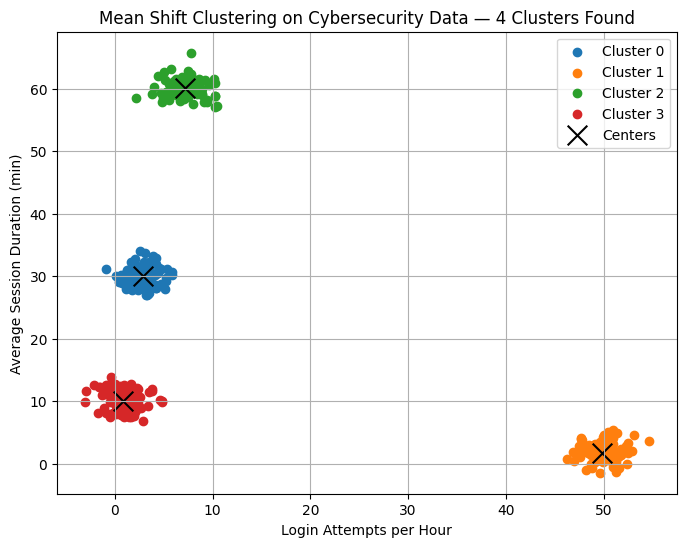

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np

# 1. Load dataset from CSV
df = pd.read_csv("/content/Synthetic Mean Shift Cluster Dataset - Auxin Security - synthetic_cybersecurity_user_behavior.csv")

# 2. Extract features for clustering
X = df[["Login Attempts/hr", "Avg Session Duration (min)"]].values

# 3. Estimate a good bandwidth for Mean Shift
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=400)

# 4. Apply Mean Shift clustering
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
n_clusters = len(np.unique(labels))

# 5. Add labels to the DataFrame
df["Cluster"] = labels

# 6. Plot results
plt.figure(figsize=(8, 6))
for k in range(n_clusters):
    cluster = df[df["Cluster"] == k]
    plt.scatter(cluster["Login Attempts/hr"], cluster["Avg Session Duration (min)"], label=f'Cluster {k}')

# Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            c='black', s=200, marker='x', label='Centers')

plt.title(f'Mean Shift Clustering on Cybersecurity Data — {n_clusters} Clusters Found')
plt.xlabel("Login Attempts per Hour")
plt.ylabel("Average Session Duration (min)")
plt.legend()
plt.grid(True)
plt.show()